# Analyzing results of grid search

This notebook assumes you've downloaded data and run a grid search experiment
```sh
make update  # many hours
python mutrans.py --grid-search  # many hours
```

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"] = 200

In [2]:
df = pd.read_csv("results/grid_search.tsv", sep="\t")
df = df.fillna("")
df

,model_type,cond_data,England B.1.1.7 MAE,England B.1.1.7 RMSE,England MAE,England RMSE,MAE,RMSE,loss,|μ|/σ max,...,ΔlogR(S:D614G) mean,ΔlogR(S:D614G) std,ΔlogR(S:E484K) mean,ΔlogR(S:E484K) std,ΔlogR(S:L452R) mean,ΔlogR(S:L452R) std,ΔlogR(S:N501Y) mean,ΔlogR(S:N501Y) std,ρ_lineage,ρ_mutation
0,,,0.033575,0.154390,0.000514,0.008970,0.001199,0.017287,1.008616e+06,220.486801,...,-1.757965,0.022413,2.567250,0.028272,4.013447,0.057785,1.397860,0.022353,0.605638,0.024206
1,,feature_scale=0.1,0.034175,0.155773,0.000523,0.008814,0.001200,0.017013,1.022727e+06,205.673477,...,0.595690,0.032525,7.638274,0.051339,14.796296,0.090418,6.828228,0.041105,0.861849,0.296164
2,overdispersed,,0.077839,0.177889,0.000735,0.008342,0.000905,0.012538,9.626190e+06,133080.265625,...,0.659082,0.000005,0.430558,0.000058,0.109817,0.000075,0.730490,0.000091,0.132633,0.104454
3,overdispersed,feature_scale=0.1,0.076243,0.176983,0.000731,0.008272,0.000900,0.012503,9.616324e+06,40371.964844,...,0.403244,0.000010,0.241585,0.000062,0.867099,0.000099,0.421465,0.000083,0.272665,0.112427
4,dirichlet,,0.157387,0.297380,0.000927,0.011810,0.001201,0.017007,8.180602e+05,85.667938,...,-0.853859,0.071798,3.382086,0.123606,5.294808,0.296789,2.720710,0.076721,0.714565,0.284673
5,dirichlet,feature_scale=0.1,0.168839,0.317719,0.000969,0.011760,0.001208,0.016433,8.230564e+05,71.177032,...,1.051066,0.120911,7.379185,0.208833,12.027385,0.299227,6.582577,0.200458,0.915521,0.471009
6,biased,,0.035271,0.083200,0.000564,0.006902,0.001240,0.020910,2.326687e+07,213.074493,...,-95.289780,0.496814,57.334995,4.565539,45.983246,7.324780,33.667114,7.741857,0.248496,0.290021
7,biased,feature_scale=0.1,0.034190,0.079971,0.000561,0.006835,0.001240,0.020751,2.381208e+07,97.969688,...,-162.420639,2.205356,0.162116,0.195372,0.037794,0.139510,0.153351,0.183460,0.816786,0.889804
8,biased-overdispersed,,0.053260,0.165468,0.000559,0.007772,0.000718,0.010952,2.329043e+07,348.283142,...,0.188642,0.000576,-0.352052,0.009870,0.117128,0.010651,0.179639,0.010554,0.706986,0.223415
9,biased-overdispersed,feature_scale=0.1,0.052455,0.165081,0.000556,0.007577,0.000719,0.010957,2.330958e+07,184.194839,...,-0.005649,0.000395,-0.122082,0.009133,0.252905,0.012565,0.263443,0.013255,0.716219,0.404100


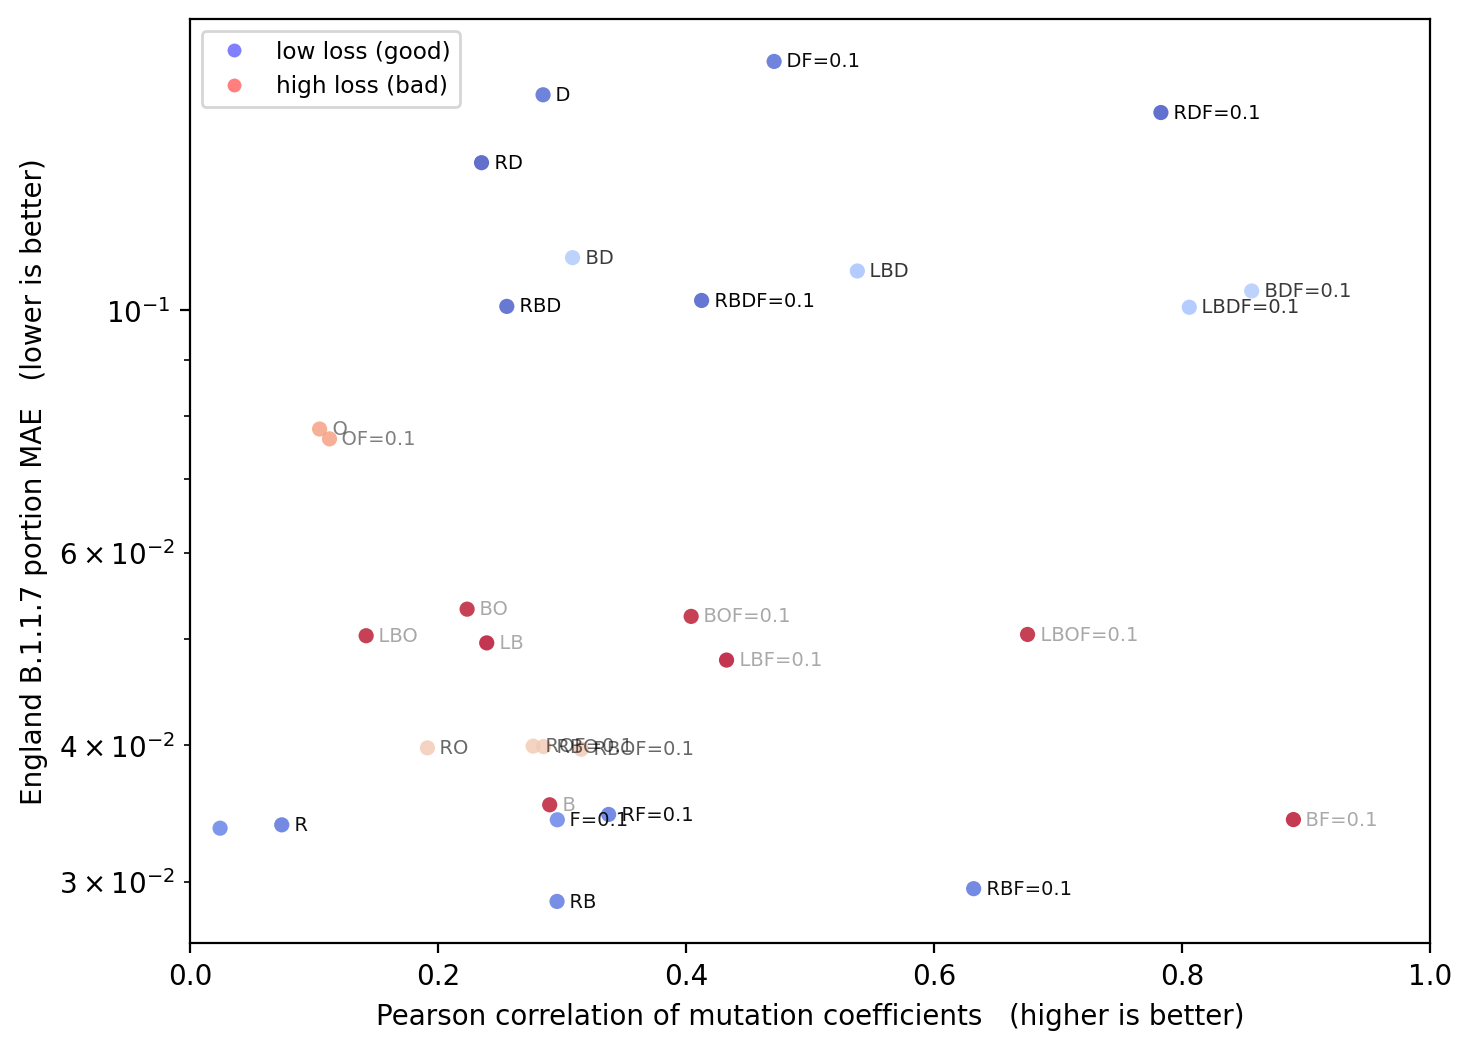

In [3]:
model_type = df["model_type"].to_list()
cond_data = df["cond_data"].to_list()
corr = df["ρ_mutation"].to_numpy()
mae = df["England B.1.1.7 MAE"].to_numpy()
loss = df["loss"].to_numpy()
assert (loss > 0).all(), "you'll need to switch to symlog or sth"
loss = np.log(loss)
loss -= loss.min()
loss /= loss.max()

def plot_corr_vs_mae():
    plt.figure(figsize=(8, 6))
    plt.scatter(corr, mae, 30, loss, lw=0, alpha=0.8, cmap="coolwarm")
    plt.xlabel("Pearson correlation of mutation coefficients   (higher is better)")
    plt.ylabel("England B.1.1.7 portion MAE   (lower is better)")
    for x, y, mt, cd, l in zip(corr, mae, model_type, cond_data, loss):
        name = (
            f"  {mt}{cd}"
            .replace("feature_scale", "F")
            .replace("reparam", "R")
            .replace("locally", "L")
            .replace("biased", "B")
            .replace("overdispersed", "O")
            .replace("dirichlet", "D")
            .replace("-", "")
        )
        plt.text(x, y, name, fontsize=7, va="center", alpha=1 - 0.666 * l)
    plt.plot([], [], "bo", markeredgewidth=0, markersize=5, alpha=0.5, label="low loss (good)")
    plt.plot([], [], "ro", markeredgewidth=0, markersize=5, alpha=0.5, label="high loss (bad)")
    plt.legend(loc="upper left", fontsize="small")
    plt.xlim(0, 1)
    plt.yscale("log")
plot_corr_vs_mae()